# 1. Import Library

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# generate classification report using predictions for categorical model
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Import dataset

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
print(df.shape)
df.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# 3. Data Preprocessing

### 3.1. Feature scaling

In [3]:
df = df.drop(['CustomerID'],axis =1)
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[selected_features]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = selected_features
print(X_scaled.shape)
X_scaled.head()

(690, 14)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158


### 3.2. Split data into X & y

In [4]:
X = X_scaled  #independent columns
y = df['Class']    #target column i.e price range

scaled_df = pd.concat([X,y],axis=1)

### Split data into train and test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
X_train.shape, X_test.shape

((552, 14), (138, 14))

In [6]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.44565217391304346
0.4420289855072464


# 4. Predictive Model

### 4.1. Train and perform cross validation

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
# initiate model
model = GradientBoostingClassifier()

kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
scores

array([0.82142857, 0.875     , 0.87272727, 0.78181818, 0.89090909,
       0.85454545, 0.87272727, 0.89090909, 0.92727273, 0.87272727])

In [8]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

Accuracy: 86.60% (+/- 3.80%)


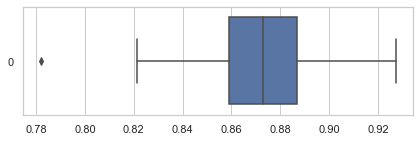

In [9]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### 4.2. Training

In [10]:
# select a class of model
from sklearn.ensemble import GradientBoostingClassifier
# initiate model
model = GradientBoostingClassifier()
# train model
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
# default parameters
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 4.3. Prediction

In [12]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

### 4.3. Model Evaluation

#### Accuracy

In [13]:
accuracy_score(y_train, y_train_pred)

0.980072463768116

In [14]:
accuracy_score(y_test, y_test_pred)

0.8840579710144928

#### Confusion matrix & Classification Report 

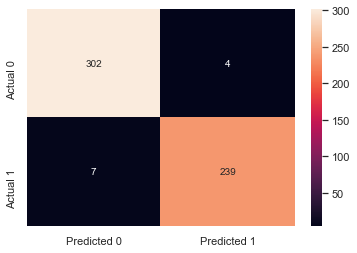

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       306
           1       0.98      0.97      0.98       246

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552



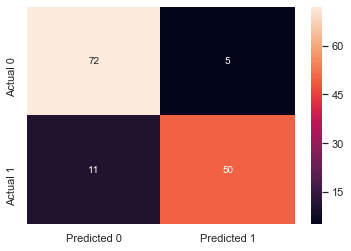

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        77
           1       0.91      0.82      0.86        61

    accuracy                           0.88       138
   macro avg       0.89      0.88      0.88       138
weighted avg       0.89      0.88      0.88       138



#### ROC AUC Score

In [19]:
roc_auc_score(y_train, prob_train_pred[:,1])

0.9960545193687231

In [20]:
roc_auc_score(y_test, prob_test_pred[:,1])

0.9331488183947201

#### ROC Curve

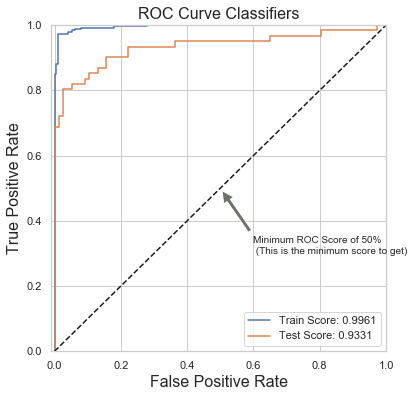

In [21]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

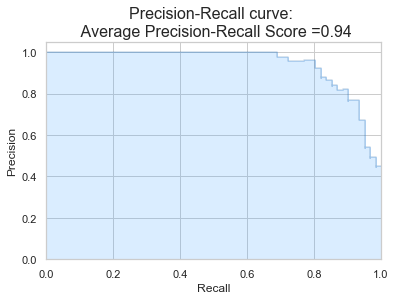

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

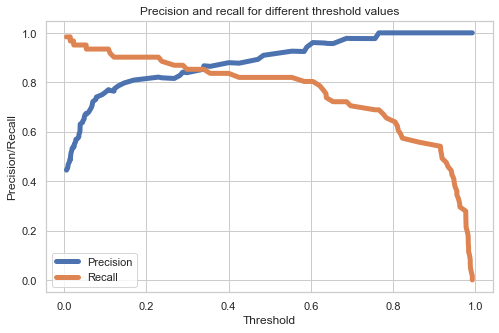

In [23]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =1.00')

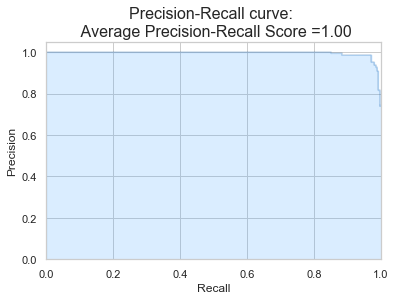

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

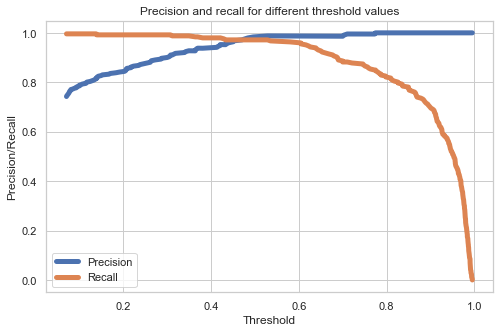

In [25]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [26]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'Logistic Regression')

Model Evaluation of Logistic Regression
-----------------------------------------------------------
Train set
Accuracy:  0.980072463768116
ROC AUC Score:  0.9960545193687231
Confusion matrix
Predicted    0    1
Actual             
0          302    4
1            7  239
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       306
           1       0.98      0.97      0.98       246

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552

-----------------------------------------------------------
Test set
Accuracy:  0.8840579710144928
ROC AUC Score:  0.9331488183947201
Confusion matrix
Predicted   0   1
Actual           
0          72   5
1          11  50
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        77
           1       0.91      0.82      0.86        61

    accuracy   

### 4.4 Tuning hyper-parameters

#### learning rate

In [27]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    best_model = GradientBoostingClassifier(learning_rate = learning_rate,random_state = 42)
    best_model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.980
Accuracy score (validation): 0.884

Learning rate:  0.1
Accuracy score (training): 0.980
Accuracy score (validation): 0.884

Learning rate:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.884

Learning rate:  0.5
Accuracy score (training): 0.980
Accuracy score (validation): 0.884

Learning rate:  0.75
Accuracy score (training): 0.980
Accuracy score (validation): 0.884

Learning rate:  1
Accuracy score (training): 0.980
Accuracy score (validation): 0.884



#### Apply grid search

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
}
grid_clf = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, scoring = 'accuracy', cv = 10, verbose = 2)

#### Re-run with best parameters

In [41]:
grid_clf.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter bootstrap for estimator GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [37]:
best_model = grid_clf.best_estimator_
best_model.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [35]:
best_model = GradientBoostingClassifier(learning_rate = 0.75, random_state = 42)
best_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
# default parameters
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.75,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 83.71% (+/- 10.40%)


In [36]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 84.44% (+/- 8.60%)


In [37]:
scores

array([0.76785714, 0.82142857, 0.87272727, 0.8       , 0.83636364,
       0.81818182, 0.83636364, 0.89090909, 0.89090909, 0.90909091])

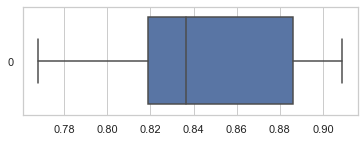

In [38]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [39]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
prob_train_pred = best_model.predict_proba(X_train)

y_test_pred = best_model.predict(X_test)
prob_test_pred = best_model.predict_proba(X_test)

In [41]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'GBT')

Model Evaluation of GBT
-----------------------------------------------------------
Train set
Accuracy:  1.0
ROC AUC Score:  1.0
Confusion matrix
Predicted    0    1
Actual             
0          306    0
1            0  246
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       246

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

-----------------------------------------------------------
Test set
Accuracy:  0.8405797101449275
ROC AUC Score:  0.9133489461358314
Confusion matrix
Predicted   0   1
Actual           
0          68   9
1          13  48
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.84      0.79      0.81        61

    accuracy                           0.84       138
   mac

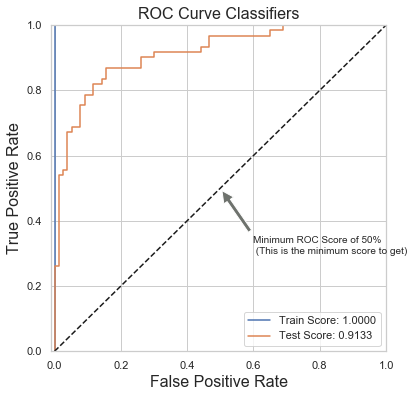

In [42]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()